In [ ]:
# !pip install pandas
import pandas as pd

# arquivo muito grande para fazer upload no github
# uri = https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr/versions/1?resource=download
df = pd.read_csv('imdb-reviews-pt-br.csv')
df.head

In [2]:
# !pip install scikit-learn
from sklearn.model_selection import train_test_split

# divide os dados para treino do modelo e teste desse modelo
treino, teste, classe_treino, classe_teste = train_test_split(df.text_pt, df.sentiment, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
# esse modelo vai calcular a possibilidade de determinada classificação - positivo ou negativo

# modelo
regressao_logistica = LogisticRegression()
# treino do modelo com os dados
regressao_logistica.fit(treino, classe_treino)
# teste da qualidade do modelo
acuracia = regressao_logistica.score(teste, classe_teste)
# por motivos óbvios, o modelo não é capaz de interpretar o texto

In [4]:
# padronizando a coluna Sentiment
classificacao = df['sentiment'].replace(['neg', 'pos'], [0,1])
df['classificacao'] = classificacao

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# vetorizar o corpus em um vetor bag of words
vetorizar = CountVectorizer(lowercase=False, max_features=50)
    # max_features define o tamanho da matriz escolhendo só as n palavras que mais aparecem
bag_of_words = vetorizar.fit_transform(df.text_pt)

dicionario = vetorizar.get_feature_names_out()

# recebe uma matriz esparsa - de zeros e NaN - e retorna um DF
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=dicionario)

In [6]:
def classificar_txt(texto, coluna_txt, coluna_classe):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_txt])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classe], random_state=42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

classificar_txt(df, 'text_pt', 'classificacao')
    

0.6583097452486858

In [7]:
#!pip install wordcloud

#%matplotlib inline
from wordcloud import WordCloud

# junta todas as frases - separadas como valores - numa array, para, com o join, juntar todas e separá-las pelo " "
todas_palavras = " ".join([texto for texto in df.text_pt])

nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    # collocations = tira os bigramas ("palavras duplas", como 'este filme') e filtra só palavras "soltas"

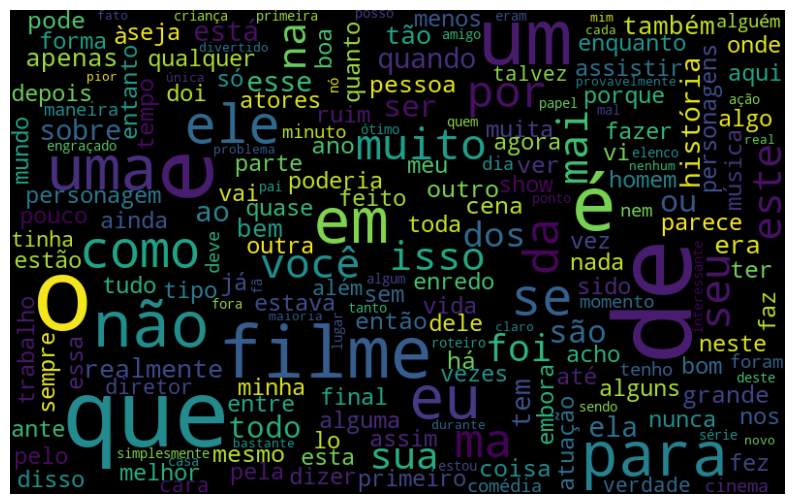

In [8]:
import matplotlib.pyplot as plt

# plotando as palavras mais frequentes para entender melhor o conjunto de dados
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
    # interpolation = melhora a qualidade
plt.axis("off")
plt.show()

In [9]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query('classificacao == 1')
    todas_palavras = " ".join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query('classificacao == 0')
    todas_palavras = " ".join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

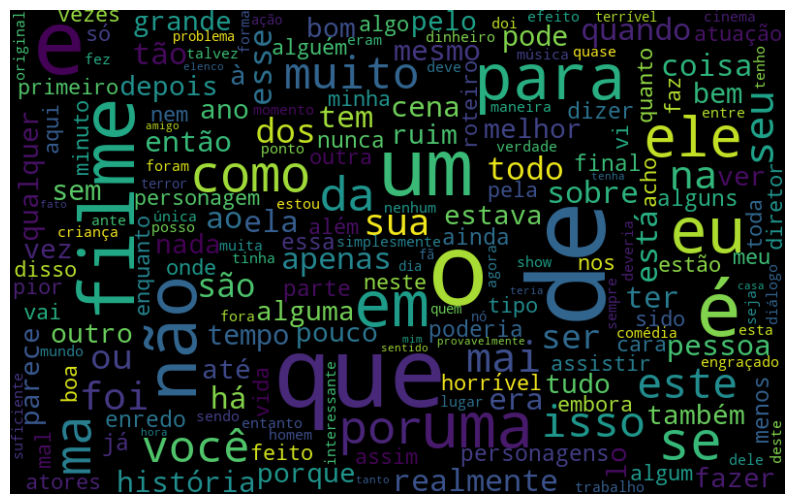

In [10]:
nuvem_palavras_neg(df, 'text_pt')

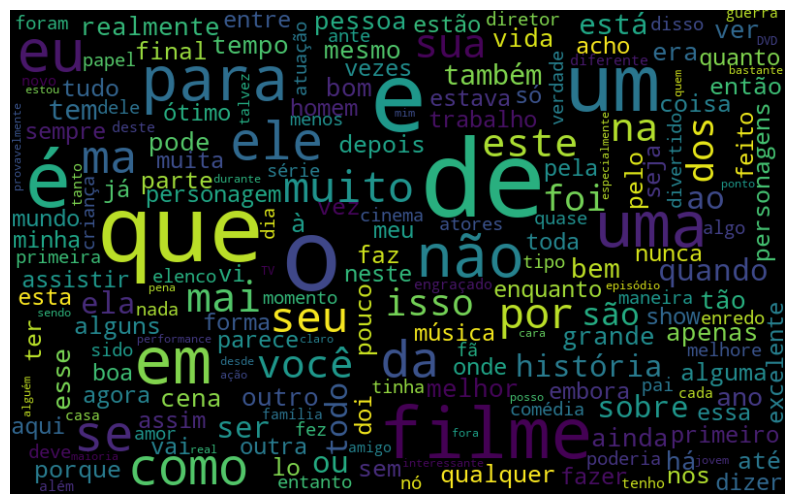

In [11]:
nuvem_palavras_pos(df, 'text_pt')

In [ ]:
#!pip install nltk
import nltk

nltk.download('all')

In [14]:
import nltk
from nltk import tokenize

frase = 'bem vindo ao mundo do PLN!'

token_espaco = tokenize.WhitespaceTokenizer()
    # separa as palavras entre os espaços
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [15]:
token_frase = token_espaco.tokenize(todas_palavras)
    # todas_palavras = string com todas as resenhas
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [16]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                            'Frequencia': list(frequencia.values())})
df_frequencia

,Palavra,Frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [17]:
df_frequencia.nlargest(columns = 'Frequencia', n = 10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [ ]:
#!pip install seaborn
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.barplot(data = df_frequencia, x = 'Palavra', y = 'Frequencia', color = 'gray')
ax.set(ylabel='Contagem')
plt.show()